<a href="https://colab.research.google.com/github/jojivk/The-Ramp/blob/master/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [4]:
train_data[0]
train_labels[0]

1

In [9]:
max([max(sequence) for sequence in train_data])
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(reverse_word_index.get(i-3, '?') for i in train_data[0])


In [10]:
import numpy as np
def vectorize_sequence(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] =1
  return results;

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [13]:
x_train[0]
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [14]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [16]:
model.compile(optimizer='rmsprop',
              loss='binray_crossentropy',
              metrics=['accuracy'])
from keras import optimizers

In [19]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20,
                    batch_size=512, validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()


Epoch 1/20
30/30 [==============================] - 16s 64ms/step - loss: 0.5856 - accuracy: 0.7109 - val_loss: 0.3922 - val_accuracy: 0.8597
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3250 - accuracy: 0.9008 - val_loss: 0.3053 - val_accuracy: 0.8871
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2293 - accuracy: 0.9286 - val_loss: 0.2849 - val_accuracy: 0.8856
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1737 - accuracy: 0.9436 - val_loss: 0.3118 - val_accuracy: 0.8733
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1433 - accuracy: 0.9566 - val_loss: 0.2790 - val_accuracy: 0.8884
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1188 - accuracy: 0.9638 - val_loss: 0.3023 - val_accuracy: 0.8845
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0965 - accuracy: 0.9735 - val_loss: 0.3068 - val_accuracy: 0.8840
Epoch 8/20
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

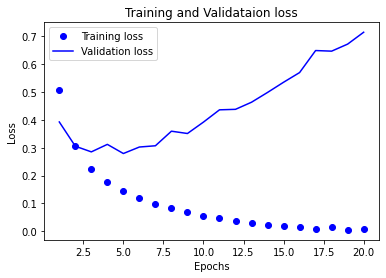

In [25]:
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validataion loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



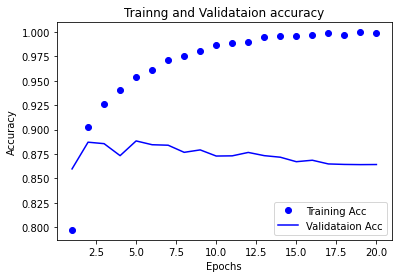

In [28]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validataion Acc')
plt.title('Trainng and Validataion accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()